In [2]:
from scipy.stats import uniform, beta, bernoulli
import numpy as np

In [3]:
k = 3 # number of bandits
thetas = uniform(0, 1).rvs(k)
a, b = np.ones(k), np.ones(k) # params for beta prior
N = 1_000 # time steps
actions = []

for t in range(N):
    theta_hat = beta(a, b).rvs(k)
    action = np.argmax(theta_hat)
    
    reward = bernoulli(thetas[action]).rvs()
    # update prior
    a[action] += reward # number of successes
    b[action] += (1-reward) # number of failures
    
    actions.append(action)

In [6]:
thetas

array([0.45293393, 0.50444233, 0.27609773])

In [7]:
import pandas
df = pandas.DataFrame([np.array(actions) == a for a in range(k)]).T

In [8]:
df

,0,1,2
0,False,False,True
1,False,True,False
2,False,True,False
3,False,False,True
4,False,False,True
...,...,...,...
995,False,True,False
996,False,True,False
997,False,True,False
998,False,True,False


<AxesSubplot:>

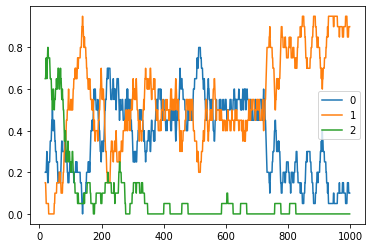

In [11]:
df.rolling(20).mean().plot.line()